In [10]:
import pandas as pd

# Load the data
data = pd.read_csv('datasets/monthly_purchases.csv')

# Display the first few rows of the dataset
print(data.head())

# Drop rows with missing values
data_cleaned = data.dropna()

# Display the shape of the cleaned data
print(f'Cleaned data shape: {data_cleaned.shape}')

   CUST_ID  MONTH_1  MONTH_2  MONTH_3  MONTH_4  MONTH_5  MONTH_6  MONTH_7  \
0     5320    150.0     75.0    200.0    100.0    175.0     75.0   2625.0   
1     5321     25.0     50.0    150.0    200.0    175.0    200.0   1875.0   
2     5322     75.0    150.0      0.0     25.0     75.0     25.0   1031.2   
3     5323    200.0    200.0     25.0    100.0     75.0    150.0   2351.2   
4     5324    200.0    200.0    125.0     75.0    175.0    200.0   3105.0   

   MONTH_8  MONTH_9  MONTH_10    CLV  Ad Spend  
0  2625.00  2625.00   2625.00  13125   2625.00  
1  1875.00  1875.00   1875.00   9375   1875.00  
2  1031.20  1031.20   1031.20   5156   1031.20  
3  1645.84  1645.84   1645.84  11756   1645.84  
4  2173.50  2173.50   2173.50  15525   2173.50  
Cleaned data shape: (100, 13)


In [11]:
# Review the data types
data_types = data_cleaned.dtypes
print(data_types)

CUST_ID       int64
MONTH_1     float64
MONTH_2     float64
MONTH_3     float64
MONTH_4     float64
MONTH_5     float64
MONTH_6     float64
MONTH_7     float64
MONTH_8     float64
MONTH_9     float64
MONTH_10    float64
CLV           int64
Ad Spend    float64
dtype: object


In [12]:
# 'CUST_ID' is not needed for analysis
data_relevant = data_cleaned.drop(columns=['CUST_ID'], errors='ignore')

# Display the remaining columns
print(data_relevant.columns)

Index(['MONTH_1', 'MONTH_2', 'MONTH_3', 'MONTH_4', 'MONTH_5', 'MONTH_6',
       'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10', 'CLV', 'Ad Spend'],
      dtype='object')


In [13]:
# Calculate correlation matrix
correlation_matrix = data_relevant.corr()

# Check correlation with 'CLV' and 'Ad Spend'
clv_correlation = correlation_matrix['CLV']
ad_spend_correlation = correlation_matrix['Ad Spend']

# Display correlations
print("Correlation with CLV:\n", clv_correlation)
print("\nCorrelation with Ad Spend:\n", ad_spend_correlation)

Correlation with CLV:
 MONTH_1     0.044732
MONTH_2     0.156769
MONTH_3    -0.008345
MONTH_4     0.141935
MONTH_5     0.024152
MONTH_6    -0.049554
MONTH_7     0.625479
MONTH_8     0.354934
MONTH_9     0.700048
MONTH_10    0.594467
CLV         1.000000
Ad Spend    0.643211
Name: CLV, dtype: float64

Correlation with Ad Spend:
 MONTH_1     0.362963
MONTH_2    -0.112375
MONTH_3     0.191350
MONTH_4     0.113878
MONTH_5     0.024077
MONTH_6     0.206858
MONTH_7     0.514088
MONTH_8     0.429864
MONTH_9     0.875176
MONTH_10    0.471905
CLV         0.643211
Ad Spend    1.000000
Name: Ad Spend, dtype: float64


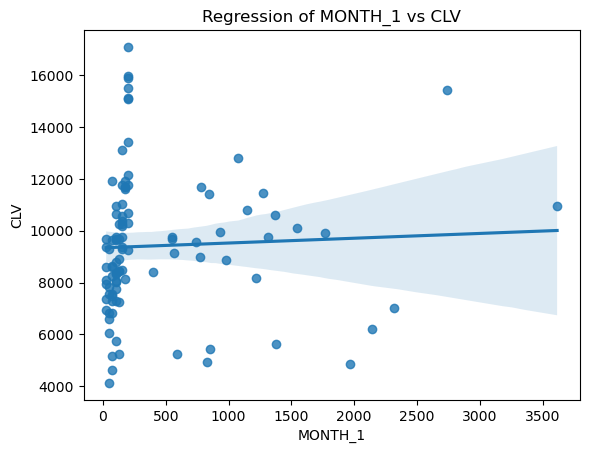

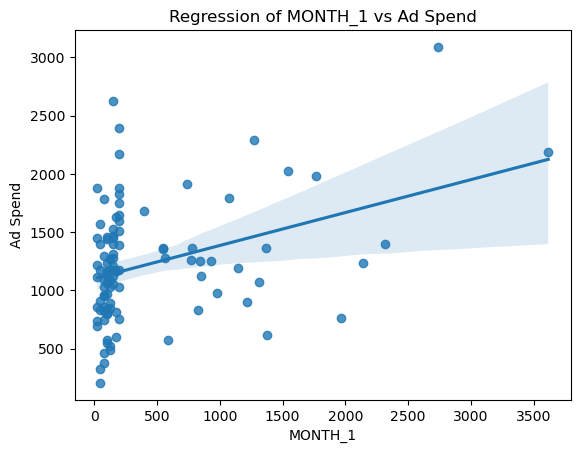

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Regression plot for Monthly Purchases vs CLV
sns.regplot(x='MONTH_1', y='CLV', data=data_relevant)
plt.title('Regression of MONTH_1 vs CLV')
plt.show()

# Regression plot for Monthly Purchases vs Ad Spend
sns.regplot(x='MONTH_1', y='Ad Spend', data=data_relevant)
plt.title('Regression of MONTH_1 vs Ad Spend')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define features (X) and target (y)
X = data_relevant.drop(columns=['CLV'])
y = data_relevant['CLV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Check the model's performance
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Training score: {train_score}")
print(f"Testing score: {test_score}")

Training score: 0.7448865004380006
Testing score: 0.6174162345573516


In [21]:
# Predict the CLV for new customers (example input data)
new_customer_data = [[100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 500]]

# Example: Monthly purchases for 10 months
predicted_clv = model.predict(new_customer_data)

print(f"Predicted CLV for the new customer: {predicted_clv[0]}")

Predicted CLV for the new customer: 4938.644014484584


/usr/local/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


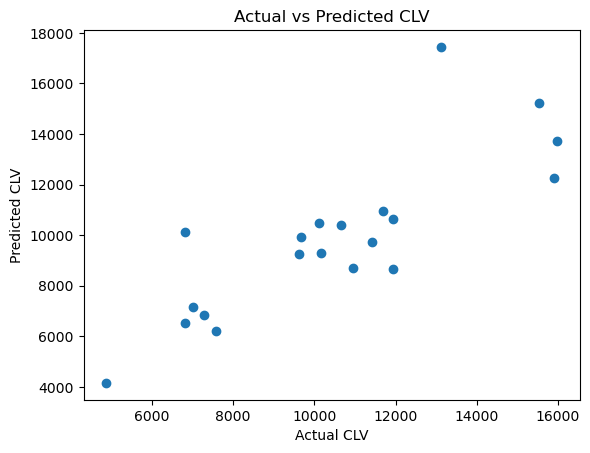

In [22]:
# Predict CLV on the test set
y_pred = model.predict(X_test)

# Visualize actual vs predicted CLV
plt.scatter(y_test, y_pred)
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.title('Actual vs Predicted CLV')
plt.show()